# Econ 412 HW2
## Juntao Li
## 906092273

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import linearmodels as plm
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

### 4.4

In [2]:
# Import Annual Data
Price = pd.read_excel('HP.xls')
Price = Price.set_index("Year")

Price.head()

,US House Price Index (Freddie Mac),30-year fixed mortgage rate (average)
Year,,
1971,33.50,7.546667
1972,35.94,7.380000
1973,39.45,8.040000
1974,42.58,9.190000
1975,44.90,9.050000


In [3]:
PriceQ=pd.read_excel('HP_Q.xls')

PriceQ.head()

,observation_date,MORTGAGE30US,QUSR628BIS
0,1971-04-01,7.413077,62.6407
1,1971-07-01,7.658462,62.6485
2,1971-10-01,7.552857,63.8429
3,1972-01-01,7.349231,63.5690
4,1972-04-01,7.346923,64.8514


In [4]:
PriceQ = PriceQ.rename(columns = {"observation_date":"Time",
                              "QUSR628BIS":"HP",
                              "MORTGAGE30US":"Rate"})

# Calculate Changes
PriceQ["HP_growth"] = PriceQ["HP"].pct_change()
PriceQ["Rate_change"] = PriceQ["Rate"].diff()

# Creat lag values for house price growth
PriceQ["hpgr_lag1"] = PriceQ["HP_growth"].shift(1)
PriceQ["hpgr_lag2"] = PriceQ["HP_growth"].shift(2)
PriceQ["hpgr_lag3"] = PriceQ["HP_growth"].shift(3)
PriceQ["hpgr_lag4"] = PriceQ["HP_growth"].shift(4)

PriceQ.head()

,Time,Rate,HP,HP_growth,Rate_change,hpgr_lag1,hpgr_lag2,hpgr_lag3,hpgr_lag4
0,1971-04-01,7.413077,62.6407,NaN,NaN,NaN,NaN,NaN,NaN
1,1971-07-01,7.658462,62.6485,0.000125,0.245385,NaN,NaN,NaN,NaN
2,1971-10-01,7.552857,63.8429,0.019065,-0.105604,0.000125,NaN,NaN,NaN
3,1972-01-01,7.349231,63.5690,-0.004290,-0.203626,0.019065,0.000125,NaN,NaN
4,1972-04-01,7.346923,64.8514,0.020173,-0.002308,-0.004290,0.019065,0.000125,NaN


In [5]:
Price = Price.rename(columns = {"US House Price Index (Freddie Mac)":"HP","30-year fixed mortgage rate (average)":"Rate"})

Price["HP_growth"] = Price["HP"].pct_change()
Price["Rate_change"] = Price["Rate"].diff()

# Creat lag values for house price
Price["hp_lag1"] = Price["HP"].shift(1)
Price["hp_lag2"] = Price["HP"].shift(2)
Price["hp_lag3"] = Price["HP"].shift(3)
Price["hp_lag4"] = Price["HP"].shift(4)

# Creat lag values for mortgage rate
Price["rate_lag1"] = Price["Rate"].shift(1)
Price["rate_lag2"] = Price["Rate"].shift(2)
Price["rate_lag3"] = Price["Rate"].shift(3)
Price["rate_lag4"] = Price["Rate"].shift(4)


Price.head()

,HP,Rate,HP_growth,Rate_change,hp_lag1,hp_lag2,hp_lag3,hp_lag4,rate_lag1,rate_lag2,rate_lag3,rate_lag4
Year,,,,,,,,,,,,
1971,33.50,7.546667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,35.94,7.380000,0.072836,-0.166667,33.50,NaN,NaN,NaN,7.546667,NaN,NaN,NaN
1973,39.45,8.040000,0.097663,0.660000,35.94,33.50,NaN,NaN,7.380000,7.546667,NaN,NaN
1974,42.58,9.190000,0.079341,1.150000,39.45,35.94,33.50,NaN,8.040000,7.380000,7.546667,NaN
1975,44.90,9.050000,0.054486,-0.140000,42.58,39.45,35.94,33.5,9.190000,8.040000,7.380000,7.546667


In [6]:
# Model 1
model1 = smf.ols("HP_growth ~ hpgr_lag1",data = PriceQ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HP_growth   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     139.9
Date:                Fri, 05 May 2023   Prob (F-statistic):           8.21e-23
Time:                        16:10:03   Log-Likelihood:                 466.57
No. Observations:                 142   AIC:                            -929.1
Df Residuals:                     140   BIC:                            -923.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0016      0.001      1.887      0.061   -7.66e-05       0.003
hpgr_lag1      0.7178      0.061     11.828      0.000       0.598       0.838
==============================================================================
Omnibus:                       13.841   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.190
Skew:                          -0.415   Prob(JB):                     2.06e-06
Kurtosis:                       4.933   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Model 2
model2 = smf.ols("HP_growth ~ hpgr_lag1+hpgr_lag2",data = PriceQ).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HP_growth   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     74.66
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.06e-22
Time:                        16:10:03   Log-Likelihood:                 466.16
No. Observations:                 141   AIC:                            -926.3
Df Residuals:                     138   BIC:                            -917.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.001      1.404      0.162      -0.000       0.003
hpgr_lag1      0.6161      0.086      7.184      0.000       0.447       0.786
hpgr_lag2      0.1481      0.086      1.728      0.086      -0.021       0.318
==============================================================================
Omnibus:                       13.389   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.188
Skew:                          -0.299   Prob(JB):                     1.69e-07
Kurtosis:                       5.225   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Model 3
model3 = smf.ols("HP_growth ~ hpgr_lag1+hpgr_lag2+hpgr_lag3",data = PriceQ).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HP_growth   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     55.31
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.95e-23
Time:                        16:10:03   Log-Likelihood:                 467.18
No. Observations:                 140   AIC:                            -926.4
Df Residuals:                     136   BIC:                            -914.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.001      1.141      0.256      -0.001       0.003
hpgr_lag1      0.6229      0.085      7.319      0.000       0.455       0.791
hpgr_lag2     -0.0066      0.100     -0.066      0.947      -0.205       0.192
hpgr_lag3      0.2023      0.085      2.372      0.019       0.034       0.371
==============================================================================
Omnibus:                       18.942   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.011
Skew:                          -0.481   Prob(JB):                     3.75e-11
Kurtosis:                       5.703   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Model 4
model4 = smf.ols("HP_growth ~ hpgr_lag1+hpgr_lag2+hpgr_lag3+hpgr_lag4",data = PriceQ).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HP_growth   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     45.17
Date:                Fri, 05 May 2023   Prob (F-statistic):           5.70e-24
Time:                        16:10:03   Log-Likelihood:                 467.85
No. Observations:                 139   AIC:                            -925.7
Df Residuals:                     134   BIC:                            -911.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.001      1.117      0.266      -0.001       0.003
hpgr_lag1      0.6836      0.086      7.978      0.000       0.514       0.853
hpgr_lag2     -0.0703      0.101     -0.697      0.487      -0.270       0.129
hpgr_lag3      0.3018      0.098      3.068      0.003       0.107       0.496
hpgr_lag4     -0.1152      0.085     -1.353      0.178      -0.284       0.053
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.855
Skew:                          -0.560   Prob(JB):                     1.49e-11
Kurtosis:                       5.712   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS regression summaries shown above, we can see that only the variable hpgr_lag1 is always significant in all models. For the other three lag variables, hpgr_lag3 is significant in model 4 and these variables are all insignificant in all the other cases.

In [10]:
# Model 5
model5 = smf.ols("HP ~ hp_lag1+hp_lag2",data = Price).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4162.
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.14e-39
Time:                        16:10:03   Log-Likelihood:                -100.97
No. Observations:                  35   AIC:                             207.9
Df Residuals:                      32   BIC:                             212.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9099      1.711      1.116      0.273      -1.576       5.396
hp_lag1        1.7800      0.187      9.496      0.000       1.398       2.162
hp_lag2       -0.7827      0.204     -3.841      0.001      -1.198      -0.368
==============================================================================
Omnibus:                        8.568   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               15.973
Skew:                          -0.207   Prob(JB):                     0.000340
Kurtosis:                       6.284   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Model 6
model6 = smf.ols("HP ~ hp_lag1+hp_lag2+rate_lag1+rate_lag2",data = Price).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2094.
Date:                Fri, 05 May 2023   Prob (F-statistic):           3.09e-36
Time:                        16:10:03   Log-Likelihood:                -99.729
No. Observations:                  35   AIC:                             209.5
Df Residuals:                      30   BIC:                             217.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3060      4.535      1.391      0.175      -2.955      15.567
hp_lag1        1.7799      0.194      9.175      0.000       1.384       2.176
hp_lag2       -0.7931      0.210     -3.783      0.001      -1.221      -0.365
rate_lag1     -0.9822      0.736     -1.334      0.192      -2.486       0.521
rate_lag2      0.6377      0.727      0.877      0.387      -0.847       2.122
==============================================================================
Omnibus:                        7.082   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               11.135
Skew:                          -0.094   Prob(JB):                      0.00382
Kurtosis:                       5.757   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Model 7
model7 = smf.ols("HP ~ hp_lag1+hp_lag2+hp_lag3+hp_lag4+rate_lag1+rate_lag2+rate_lag3+rate_lag4",data = Price).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1133.
Date:                Fri, 05 May 2023   Prob (F-statistic):           5.17e-29
Time:                        16:10:03   Log-Likelihood:                -88.304
No. Observations:                  33   AIC:                             194.6
Df Residuals:                      24   BIC:                             208.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0310      5.301      0.760      0.454      -6.910      14.972
hp_lag1        2.2009      0.216     10.184      0.000       1.755       2.647
hp_lag2       -2.1825      0.501     -4.356      0.000      -3.217      -1.148
hp_lag3        1.2987      0.726      1.789      0.086      -0.199       2.797
hp_lag4       -0.2971      0.425     -0.699      0.491      -1.174       0.580
rate_lag1     -0.0008      0.797     -0.001      0.999      -1.645       1.643
rate_lag2     -0.7033      1.192     -0.590      0.561      -3.163       1.756
rate_lag3      0.5870      1.168      0.503      0.620      -1.824       2.998
rate_lag4     -0.1641      0.726     -0.226      0.823      -1.663       1.335
==============================================================================
Omnibus:                        2.777   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                1.536
Skew:                           0.309   Prob(JB):                        0.464
Kurtosis:                       3.857   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Compared to model1, model2, model3, and model4 which use quarterly data, models that use yearly data always have variables "hp_lag1" and "hp_lag2" as significant variables. Among all the models I have in this question, my favorite model is model5 since it has two significant variables and no insignificant variable.

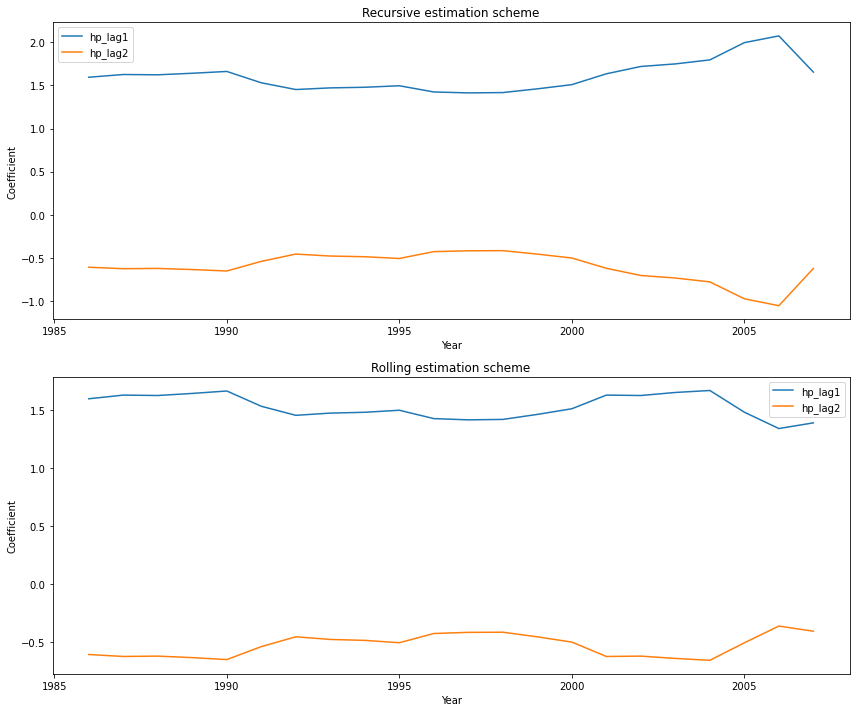

In [13]:
train_set = Price[:15]
test_set = Price[15:]

# Recursive estimation scheme
coefs_rec = []
for i in range(len(test_set)):
    data_rec = Price[:i+15] # Expand the training set
    model = smf.ols('HP ~ hp_lag1 + hp_lag2', data=data_rec).fit() 
    coefs_rec.append(model.params) 

coefs_rec = pd.DataFrame(coefs_rec) # Convert to a DataFrame
coefs_rec.index = test_set.index # Set the index to match the testing set

# Rolling estimation scheme
window_size = 15
coefs_roll = []
for i in range(len(test_set)):
    if i < window_size:
        data_roll = Price[:i+window_size]
    else:
        data_roll = Price[i-window_size+1:i+1]
    model = smf.ols('HP ~ hp_lag1 + hp_lag2', data=data_roll).fit()
    coefs_roll.append(model.params)

coefs_roll = pd.DataFrame(coefs_roll)
coefs_roll.index = test_set.index

# Plot the time series of the estimates of the regression coefficients
fig, ax = plt.subplots(2, figsize=(12, 10))
ax[0].plot(coefs_rec['hp_lag1'], label='hp_lag1')
ax[0].plot(coefs_rec['hp_lag2'], label='hp_lag2')
ax[0].set_title('Recursive estimation scheme')
ax[0].legend()
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Coefficient')
ax[1].plot(coefs_roll['hp_lag1'], label='hp_lag1')
ax[1].plot(coefs_roll['hp_lag2'], label='hp_lag2')
ax[1].set_title('Rolling estimation scheme')
ax[1].legend()
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Coefficient')
plt.tight_layout()
plt.show()

The recursive and rolling estimation schemes looks very similar to each other, but they still have some tiny differences. The coefficient of hp_lag1 in recursive estimation will reach its peak in 2006, but in rolling estimation it will be the lowest in 2006. Similarly, hp_lag2 in recursive estimation will have lowest coefficient in 2006 but in rolling estimation it will have highest coefficient.

### 6.4/a)

The coefficients of the theoretical autocorrelation function for an MA(2) process are as follows:

ρ(j) = (θ1+θ1*θ2)/(1+θ1^2+θ2^2) when j = 1

ρ(j) = (θ2)/(1+θ1^2+θ2^2) when j = 2

ρ(j) = 0 for j > 2

In [14]:
def ma2_theo_autocorr(lag, t1=-2, t2=1.35):
    if lag == 0:
        return 1
    elif lag == 1:
        return (t1 + t1 * t2) / (1 + t1 ** 2 + t2 ** 2)
    elif lag == 2:
        return t2 /( 1 + t1 ** 2 + t2 ** 2)
    else:
        return 0

auto = [ma2_theo_autocorr(lag) for lag in range(11)]
print(f'The coefficients for theoretical autocorrelation function up to lag 10:\n{auto}')

The coefficients for theoretical autocorrelation function up to lag 10:
[1, -0.6888970318798096, 0.19787467936973252, 0, 0, 0, 0, 0, 0, 0, 0]


### 6.4/b)

In [15]:
from statsmodels.tsa.stattools import acf, pacf
np.random.seed(300)
n = 100
et = np.random.normal(0, 1, n + 2)
yt = np.zeros(n+2)

for t in range(n):
    yt[t+2] = 0.7 - 2 * et[t + 1] + 1.35 * et[t] + et[t + 2]

sample_acf = acf(yt, nlags=10, fft=False)
print("Coefficients of the sample autocorrelation function up to lag 10:")
print(sample_acf)

Coefficients of the sample autocorrelation function up to lag 10:
[ 1.         -0.69958161  0.29247173 -0.18418409  0.17333596 -0.06515179
 -0.00668765  0.00351168 -0.00374515  0.05847232 -0.13327425]


The coefficients for theoretical autocorrelation function from lag 3 to lag 10 are 0 and those for the sample autocorrelation function are actually not 0. Instead, they are small numbers which are very close to 0. This is because of the existence of white noise in our sample function. The coefficient of the function from lag 3 to lag 10 should converge to 0 as the sample size increases.

### 6.5/a)

In [16]:
np.random.seed(300) 
n = 100
e = np.random.normal(size = n)
y = np.zeros(n)
for t in range(n):
    y[t] = 0.7 - 2*e[t-1] + 1.35*e[t-2] + e[t]

model_ma2 = ARIMA(y, order=(0, 0, 2))
results_ma2 = model_ma2.fit()
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -183.795
Date:                Fri, 05 May 2023   AIC                            375.589
Time:                        16:10:04   BIC                            386.010
Sample:                             0   HQIC                           379.807
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7403      0.044     16.862      0.000       0.654       0.826
ma.L1         -1.4692      0.073    -20.138      0.000      -1.612      -1.326
ma.L2          0.7610      0.073     10.453      0.0

From the summary above, we can see that the theta1 in the model above is -1.46, which is different from -2 from the theoretical model. And the theta2 in the model above is 0.76, which is also very different from 1.35 in theoretical model. I think it is because of white noise which affects the coefficient in MA(2) process. 

### 6.5/b)

In [17]:
et = 0.4
et_lag1 = -1.2

# 1-step ahead forecast
yt_plus1 = results_ma2.params[0] + results_ma2.params[1] * et + results_ma2.params[2] * et_lag1
print("1-step ahead forecast:", yt_plus1)

# 2-step and 3-step ahead forecasts
yt_plus2 = results_ma2.params[0] + results_ma2.params[1] * yt_plus1 + results_ma2.params[2] * et
yt_plus3 = results_ma2.params[0] + results_ma2.params[1] * yt_plus2 + results_ma2.params[2] * yt_plus1
print("2-step ahead forecast:", yt_plus2)
print("3-step ahead forecast:", yt_plus3)

1-step ahead forecast: -0.7606148299344888
2-step ahead forecast: 2.162120261225548
3-step ahead forecast: -3.015069086857485


### 7.6

In [18]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [19]:
cpi_food=pd.read_excel('CPI_Food.xlsx')
cpi_energy=pd.read_excel('CPI_Energy.xlsx')
cpi_shelter=pd.read_excel('CPI_Shelter.xlsx')

In [20]:
cpi_food

,Year,Period,Value
0,2013,M01,0.4
1,2013,M02,0.0
2,2013,M03,0.0
3,2013,M04,0.2
4,2013,M05,-0.1
...,...,...,...
118,2022,M11,0.2
119,2022,M12,0.3
120,2023,M01,0.7
121,2023,M02,0.4


In [21]:
cpi_energy

,Year,Period,Value
0,2013,M01,0.5
1,2013,M02,5.8
2,2013,M03,0.6
3,2013,M04,-1.9
4,2013,M05,1.2
...,...,...,...
118,2022,M11,-2.5
119,2022,M12,-6.1
120,2023,M01,3.1
121,2023,M02,-0.6


In [22]:
cpi_shelter

,Year,Period,Value
0,2013,M01,0.3
1,2013,M02,0.3
2,2013,M03,0.2
3,2013,M04,0.1
4,2013,M05,0.2
...,...,...,...
118,2022,M11,0.6
119,2022,M12,0.7
120,2023,M01,0.7
121,2023,M02,0.8


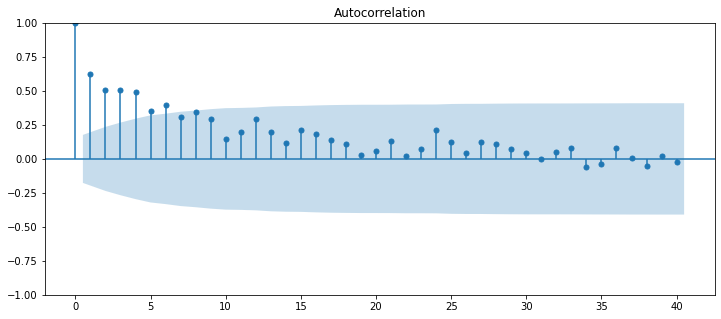

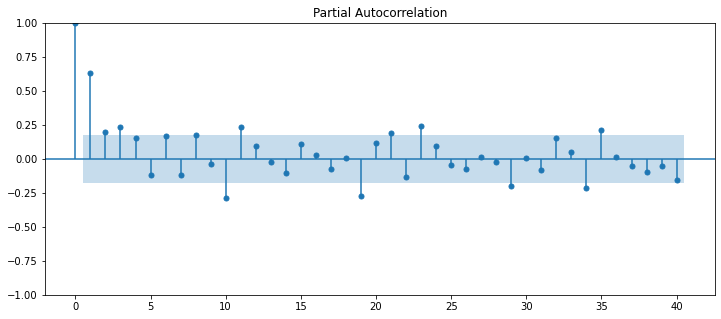

In [23]:
# Plot the ACF for cpi_food
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(cpi_food['Value'], lags=40, ax=ax)
plt.show()

# Plot the PACF for cpi_food
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(cpi_food['Value'], lags=40, ax=ax)
plt.show()

There is tail off pattern in the ACF plot and there is a huge cut off at lag 1 in the PACF plot, so the inflation in food component in cpi can be modeled as AR(1) process, not AR(2) process.

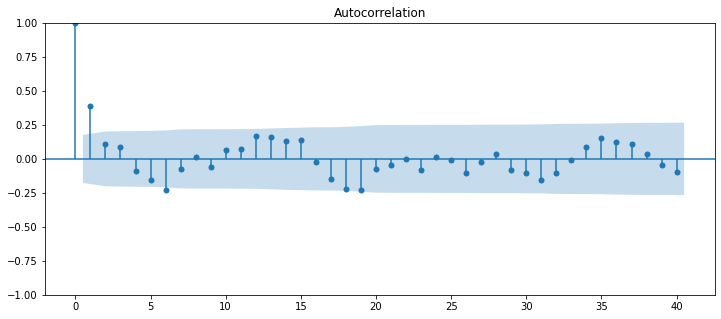

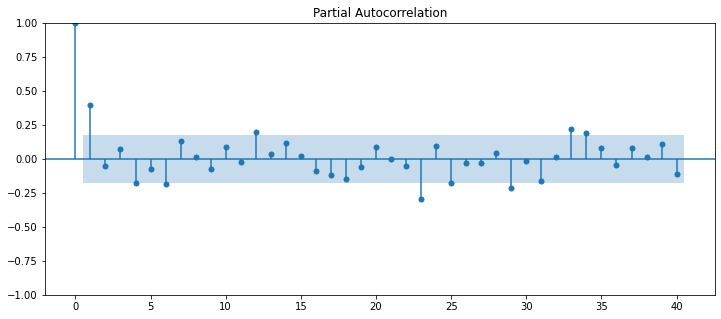

In [24]:
# Plot the ACF for cpi_energy
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(cpi_energy['Value'], lags=40, ax=ax)
plt.show()

# Plot the PACF for cpi_energy
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(cpi_energy['Value'], lags=40, ax=ax)
plt.show()

There is tail off pattern in the ACF plot and there is a huge cut off at lag 1 in the PACF plot, so the inflation in energy component in cpi can be modeled as AR(1) process, not AR(2) process.

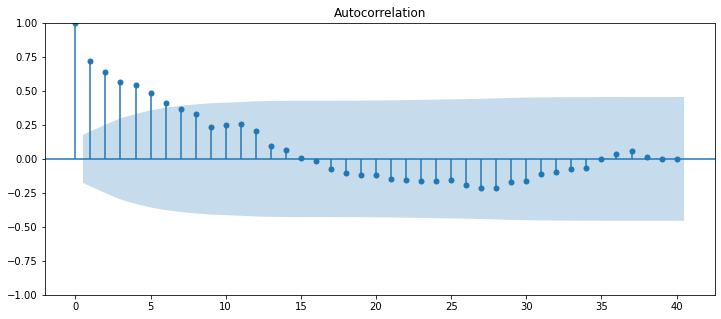

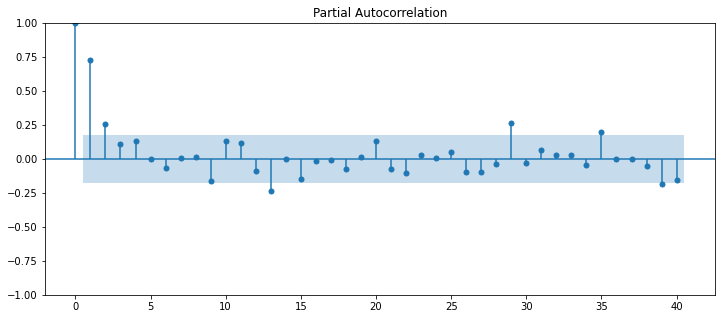

In [25]:
# Plot the ACF for cpi_shelter
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(cpi_shelter['Value'], lags=40, ax=ax)
plt.show()

# Plot the PACF for cpi_shelter
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(cpi_shelter['Value'], lags=40, ax=ax)
plt.show()

There is tail off pattern in the ACF plot and lag 3 in the PACF plot in inside the threshold, so the inflation in shelter component in cpi can be modeled as AR(2) process.

### 7.8

In [26]:
cpi_all=pd.read_excel('CPI_All.xlsx')
cpi_exclu=pd.read_excel('CPI_Exclu.xlsx')

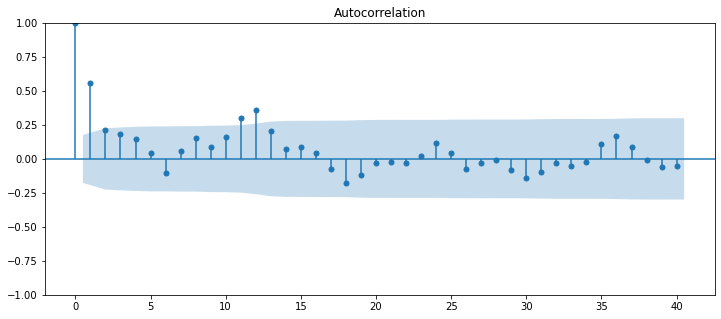

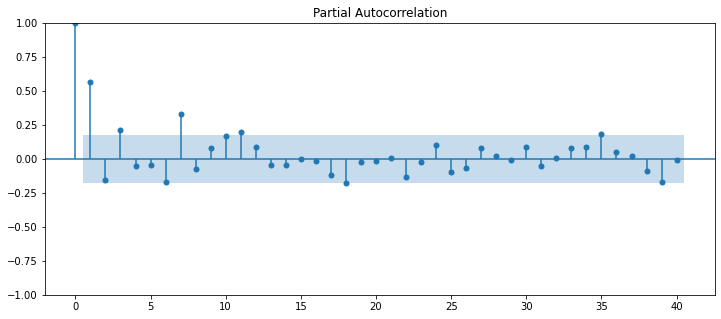

In [27]:
# Plot the ACF for cpi_all
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(cpi_all['Value'], lags=40, ax=ax)
plt.show()

# Plot the PACF for cpi_all
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(cpi_all['Value'], lags=40, ax=ax)
plt.show()

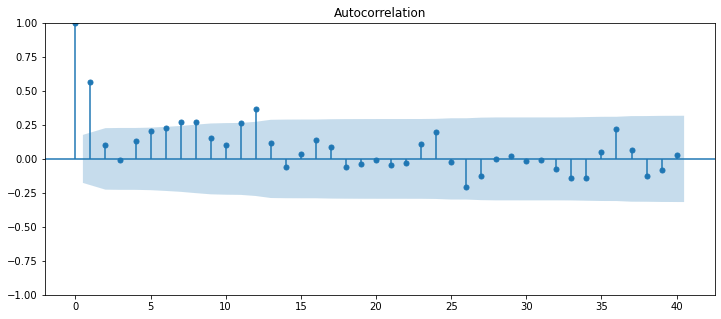

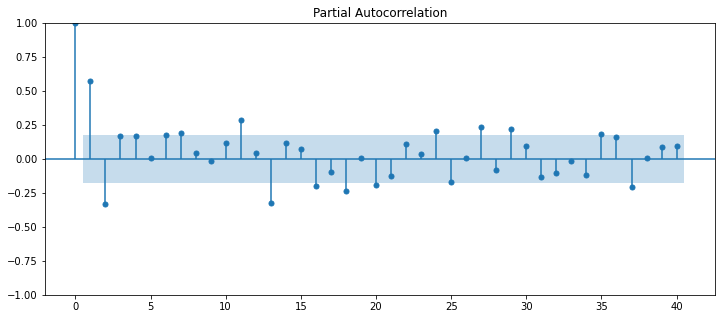

In [28]:
# Plot the ACF for cpi_exclu
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(cpi_exclu['Value'], lags=40, ax=ax)
plt.show()

# Plot the PACF for cpi_exclu
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(cpi_exclu['Value'], lags=40, ax=ax)
plt.show()

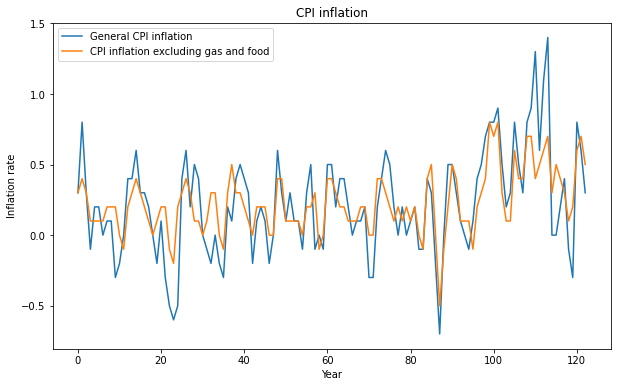

In [29]:
# Plot general CPI inflation and CPI inflation excluding gas and food
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cpi_all['Value'], label='General CPI inflation')
ax.plot(cpi_exclu['Value'], label='CPI inflation excluding gas and food')
ax.legend()
ax.set_title('CPI inflation')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation rate')
plt.show()

From the CPI inflation graph above, we can see that the general CPI inflation has more volatility than the CPI inflation excluding gas and food, especially during the time periods of high oil prices. Thus, I think the CPI inflation excluding gas and food is easier to predict since it has less volatility.

In [30]:
# Define an AR model with lag 2
model_all = sm.tsa.AutoReg(cpi_all['Value'],lags=[1,2]).fit()
model_exclu = sm.tsa.AutoReg(cpi_exclu['Value'],lags=[1,2]).fit()

In [31]:
forecast_all = model_all.predict(start=len(cpi_all), end=len(cpi_all)+1)
forecast_error_all = model_all.get_prediction(start=len(cpi_all), end=len(cpi_all)+1).se_mean
forecast_exclu = model_exclu.predict(start=len(cpi_exclu), end=len(cpi_exclu)+1)
forecast_error_exclu = model_exclu.get_prediction(start=len(cpi_exclu), end=len(cpi_exclu)+1).se_mean
# Construct 1-step ahead 95% prediction interval for general CPI inflation
z_alpha = stats.norm.ppf(0.975)
lower_bound_all_1s = forecast_all.iloc[0] - z_alpha * forecast_error_all.iloc[0]
upper_bound_all_1s = forecast_all.iloc[0] + z_alpha * forecast_error_all.iloc[0]

# Construct 1-step ahead 95% prediction interval for CPI inflation excluding gas and food
lower_bound_exclu_1s = forecast_exclu.iloc[0] - z_alpha * forecast_error_exclu.iloc[0]
upper_bound_exclu_1s = forecast_exclu.iloc[0] + z_alpha * forecast_error_exclu.iloc[0]

# Construct 2-step ahead 95% prediction interval for general CPI inflation
lower_bound_all_2s = forecast_all.iloc[1] - z_alpha * forecast_error_all.iloc[1]
upper_bound_all_2s = forecast_all.iloc[1] + z_alpha * forecast_error_all.iloc[1]

# Construct 2-step ahead 95% prediction interval for CPI inflation excluding gas and food
lower_bound_exclu_2s = forecast_exclu.iloc[1] - z_alpha * forecast_error_exclu.iloc[1]
upper_bound_exclu_2s = forecast_exclu.iloc[1] + z_alpha * forecast_error_exclu.iloc[1]

print(f'1 step forecast for general CPI:\nPoint Forecast: {forecast_all.iloc[0]}\n95% Prediction Interval:{[lower_bound_all_1s,upper_bound_all_1s]}\n')
print(f'1 step forecast for CPI excluding gas and food:\nPoint Forecast: {forecast_exclu.iloc[0]}\n95% Prediction Interval:{[lower_bound_exclu_1s,upper_bound_exclu_1s]}\n')
print(f'2 step forecast for general CPI:\nPoint Forecast: {forecast_all.iloc[1]}\n95% Prediction Interval:{[lower_bound_all_2s,upper_bound_all_2s]}\n')
print(f'2 step forecast for CPI excluding gas and food:\nPoint Forecast: {forecast_exclu.iloc[1]}\n95% Prediction Interval:{[lower_bound_exclu_2s,upper_bound_exclu_2s]}')

1 step forecast for general CPI:
Point Forecast: 0.20819574330176144
95% Prediction Interval:[-0.3660441461490593, 0.7824356327525821]

1 step forecast for CPI excluding gas and food:
Point Forecast: 0.2763324929709717
95% Prediction Interval:[-0.05646421476371155, 0.6091292007056549]

2 step forecast for general CPI:
Point Forecast: 0.19451121665252885
95% Prediction Interval:[-0.48780314205391545, 0.8768255753589731]

2 step forecast for CPI excluding gas and food:
Point Forecast: 0.17342089585180376
95% Prediction Interval:[-0.24264130926668082, 0.5894831009702883]


From the interval above, we can see that given the same step of forecast, the 95% prediction interval for general CPI is wider than that for CPI excluding gas and food. So it is harder to predict general CPI.

### 8.7

In [32]:
sp500 = pd.read_csv('SP500.csv')
FTSE = pd.read_csv('FTSE.csv')

In [33]:
returns = pd.merge(FTSE, sp500, on='Date')
returns.set_index('Date',inplace=True)
returns['return_ftse']=returns['Close'].pct_change()
returns['return_sp500']=returns['SP500'].pct_change()
returns.dropna()

,Open,High,Low,Close,SP500,return_ftse,return_sp500
Date,,,,,,,
5/5/2022,7493.45,7619.39,7493.45,7503.27,4146.87,0.001310,-0.035650
5/6/2022,7503.27,7503.27,7354.06,7387.94,4123.34,-0.015371,-0.005674
5/9/2022,7387.94,7391.59,7216.58,7216.58,3991.24,-0.023195,-0.032037
5/10/2022,7216.58,7311.65,7216.58,7243.22,4001.05,0.003691,0.002458
5/11/2022,7243.22,7349.70,7238.97,7347.66,3935.18,0.014419,-0.016463
...,...,...,...,...,...,...,...
3/30/2023,7564.27,7638.49,7564.27,7620.43,4050.83,0.007424,0.005715
3/31/2023,7620.43,7654.41,7616.09,7631.74,4109.31,0.001484,0.014437
4/3/2023,7631.74,7698.15,7631.74,7673.00,4124.51,0.005406,0.003699


In [34]:
model_return=smf.ols('return_sp500~return_ftse',data=returns).fit()
print(model_return.summary())

                            OLS Regression Results                            
Dep. Variable:           return_sp500   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     67.16
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.67e-14
Time:                        16:10:07   Log-Likelihood:                 696.08
No. Observations:                 235   AIC:                            -1388.
Df Residuals:                     233   BIC:                            -1381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0002      0.001     -0.259      

From the regression summary above, we can see that the p-value for return_ftse is 0, which is less than 0.05, so it indicates that the variable return_ftse is significant. So it is true that FTSE return can help to forecast SP500 returns.

### 8.10

In [35]:
car = pd.read_excel('carsales.xlsx', index_col="date")
car.head()

,car_domestic,car_foreign,car_total
date,,,
1967-01-01,564.1,48.1,612.2
1967-02-01,509.1,49.4,558.5
1967-03-01,670.4,65.4,735.8
1967-04-01,710.2,63.4,773.6
1967-05-01,744.8,70.1,814.9


In [36]:
car = car[['car_total']]
car

,car_total
date,
1967-01-01,612.200
1967-02-01,558.500
1967-03-01,735.800
1967-04-01,773.600
1967-05-01,814.900
...,...
2012-03-01,758.210
2012-04-01,628.090
2012-05-01,681.854


In [37]:
model = pm.auto_arima(car['car_total'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, 
                      m=12,              
                      d=None,           # let model determine 'd'
                      seasonal=True,   # include seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=6727.409, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7029.388, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6223.855, Time=1.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6488.545, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8802.150, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6500.922, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=6211.561, Time=6.15 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.65 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=6202.961, Time=1.31 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=6333.369, Time=0.66 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=6220.341, Time=3.02 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=6263.737, Time=1.49 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=6554.852, Time=1.15 sec
 ARIMA(2,0,0)(1,0,1)[12] inte

So the best model is ARIMA(3,0,1)(1,0,2)[12].

In [38]:
model_arima = ARIMA(car['car_total'], order=(3, 0, 1), seasonal_order=(1, 0, 2, 12))
model_arima_fit = model_arima.fit()

# Print the model summary
print(model_arima_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:                             car_total   No. Observations:                  547
Model:             ARIMA(3, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -3077.700
Date:                               Fri, 05 May 2023   AIC                           6173.399
Time:                                       16:12:57   BIC                           6212.139
Sample:                                   01-01-1967   HQIC                          6188.542
                                        - 07-01-2012                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        738.8899    227.792      3.244      0.001     292.425    1185.355
ar.L1      

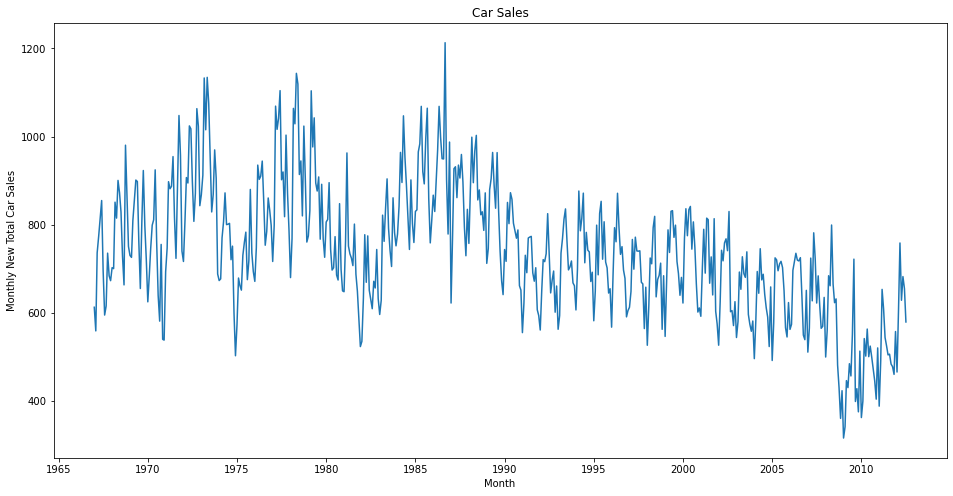

In [39]:
plt.figure(figsize = (16,8))
plt.plot(car['car_total'])
plt.xlabel('Month')
plt.ylabel('Monthly New Total Car Sales')
plt.title('Car Sales')
plt.show()

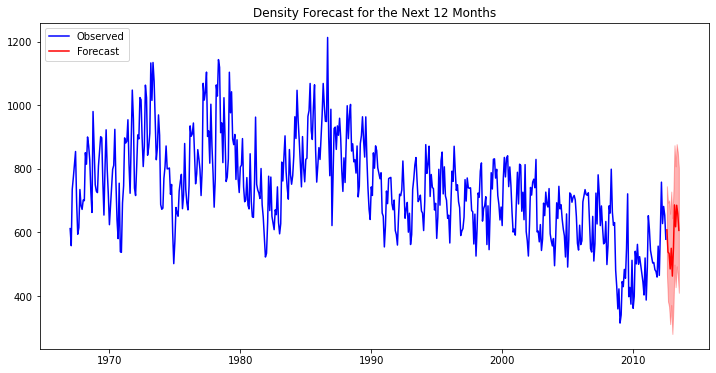

In [40]:
forecast_car = model_arima_fit.get_forecast(steps=12, alpha=0.05)

forecast_point = forecast_car.predicted_mean
conf_int = forecast_car.conf_int()

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the observed data and forecast
ax.plot(car.index, car['car_total'], label='Observed', color='blue')
ax.plot(pd.date_range(start=car.index[-1], periods=12, freq='M'), forecast_point, label='Forecast', color='red')

# confidence intervals
ax.fill_between(pd.date_range(start=car.index[-1], periods=12, freq='M'),
                conf_int.iloc[:, 0],conf_int.iloc[:, 1], alpha=0.3, color='red')

plt.legend(loc='upper left')
plt.title('Density Forecast for the Next 12 Months')
plt.show()